# EDA

La empresa GoGreen Bikesharing se dedica al alquiler de bicicletas y posee datos tales como la cantidad de bicis alquiladas por usuarios registrados, la cantidad de alquileres realizados por usuarios puntuales, y la cantidad total. 

A estos datos se les añadió información meteorológica y el calendario de festivos.

Ahora buscan analizar cuáles son los aspectos que más influyen en la cantidad de bicis que van a alquilar en un día.

In [24]:
# Tratamiento de datos
import numpy as np
import pandas as pd
#import sidetable as stb

# Gráficos
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns
import sidetable as stb

# Asunciones y Preprocesamiento
from scipy import stats


# Configuración warnings
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = False

# EDA

In [31]:
df = pd.read_csv("./bike_columnas_modificadas.csv", index_col=0)
df.sample(2)

,instant,dteday,season,yr,mnth,day,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_encoding,temp_interval,temp_interval_num,hum_interval,hum_interval_num,temp_interval_ord,hum_very_low,hum_low,hum_medium,hum_high,hum_very_high,wind_interval,wind_num_encoding
282,283,2018-10-10,autumn,0,10,10,1,1,0,1,23.4,27.1,73.4,2.834381,1514,3603,5117,2,high,"(22.14, 28.72]",high,"(58.32, 77.76]",4,0,0,0,1,0,very_low,4
384,385,2019-01-20,winter,1,1,20,0,5,1,2,8.9,11.0,45.0,13.584250,115,3048,3163,1,very_low,"(2.367, 8.98]",medium,"(38.88, 58.32]",1,0,0,1,0,0,low,3


### ELIMINAMOS COLUMNAS SOBRANTES

Después de este proceso de exploración y limpieza decidimos borrar las columnas siguientes:
- Atemp (y sus derivadas) pues sus datos son muy similiares a los de temperatura. Usaremos esta segunda.
- "Dtday": pues ya hemos desglosado esa columna en día/mes/año
- "Instant": pues funciona como un índice, y usaremos el índice del dataframe
- "Season" no podemos hacer con ella nada más a partir de este momento


In [29]:
df_bike=df.drop(columns= ['instant', 'dteday','season','atemp','temp_interval', 'temp_interval_num', 'hum_interval',
                            'hum_interval_num', 'temp_interval_ord', 'hum_very_low', 'hum_low',
                            'hum_medium', 'hum_high', 'hum_very_high', 'wind_interval',
                            'wind_num_encoding'],axis=1)

In [30]:
df_bike.head(2)

,yr,mnth,day,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt,season_encoding
0,0,1,1,0,6,0,2,14.1,80.6,10.749882,331,654,985,1
1,0,1,2,0,0,0,2,14.9,69.6,16.652113,131,670,801,1


### REORDENAMOS LAS COLUMNAS:

In [32]:
df_bike.columns

Index(['yr', 'mnth', 'day', 'holiday', 'weekday', 'workingday', 'weathersit',
       'temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt',
       'season_encoding'],
      dtype='object')

In [33]:
cols = ['cnt','casual', 'registered','season_encoding', 'yr', 'mnth', 'day', 'holiday', 'weekday', 'workingday',
                            'weathersit', 'temp','hum', 'windspeed']
df_bike = df_bike.reindex(columns=cols)

# DATAFRAME FINAL para contuniar con EDA

In [35]:
df_bike.head()

,cnt,casual,registered,season_encoding,yr,mnth,day,holiday,weekday,workingday,weathersit,temp,hum,windspeed
0,985,331,654,1,0,1,1,0,6,0,2,14.1,80.6,10.749882
1,801,131,670,1,0,1,2,0,0,0,2,14.9,69.6,16.652113
2,1349,120,1229,1,0,1,3,0,1,1,1,8.1,43.7,16.636703
3,1562,108,1454,3,0,1,4,0,2,1,1,8.2,59.0,10.739832
4,1600,82,1518,3,0,1,5,0,3,1,1,9.3,43.7,12.522300


### ¿QUE VEMOS AQUI? 

In [36]:
df_bike.describe().T

,count,mean,std,min,25%,50%,75%,max
cnt,730.0,4508.006849,1936.011647,22.000000,3169.75000,4548.500000,5966.000000,8714.000000
casual,730.0,849.249315,686.479875,2.000000,316.25000,717.000000,1096.500000,3410.000000
registered,730.0,3658.757534,1559.758728,20.000000,2502.25000,3664.500000,4783.250000,6946.000000
season_encoding,730.0,2.506849,1.117553,1.000000,2.00000,3.000000,4.000000,4.000000
yr,730.0,0.500000,0.500343,0.000000,0.00000,0.500000,1.000000,1.000000
mnth,730.0,6.526027,3.450215,1.000000,4.00000,7.000000,10.000000,12.000000
day,730.0,15.720548,8.802278,1.000000,8.00000,16.000000,23.000000,31.000000
holiday,730.0,0.028767,0.167266,0.000000,0.00000,0.000000,0.000000,1.000000
weekday,730.0,2.997260,2.006161,0.000000,1.00000,3.000000,5.000000,6.000000
workingday,730.0,0.683562,0.465405,0.000000,0.00000,1.000000,1.000000,1.000000


### ¿CUANTOS NULOS HAY? --> NO TENEMOS

In [37]:
df_bike.isnull().sum()

cnt                0
casual             0
registered         0
season_encoding    0
yr                 0
mnth               0
day                0
holiday            0
weekday            0
workingday         0
weathersit         0
temp               0
hum                0
windspeed          0
dtype: int64

### ¿CUALES SON CATEGORICAS Y/O NUMÉRCIAS? ¿NECESITO CAMBIARLAS?

    Si , necesitamos poner las que tienen ENCODING como categorias, ya que son categorias.

In [38]:
# Primero vemos que tipo de categoria tienen por defecto
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cnt              730 non-null    int64  
 1   casual           730 non-null    int64  
 2   registered       730 non-null    int64  
 3   season_encoding  730 non-null    int64  
 4   yr               730 non-null    int64  
 5   mnth             730 non-null    int64  
 6   day              730 non-null    int64  
 7   holiday          730 non-null    int64  
 8   weekday          730 non-null    int64  
 9   workingday       730 non-null    int64  
 10  weathersit       730 non-null    int64  
 11  temp             730 non-null    float64
 12  hum              730 non-null    float64
 13  windspeed        730 non-null    float64
dtypes: float64(3), int64(11)
memory usage: 85.5 KB


In [40]:
#Mostramos este head para ver poco a poco que categorias debemos cambiar
df_bike.head(2)

,cnt,casual,registered,season_encoding,yr,mnth,day,holiday,weekday,workingday,weathersit,temp,hum,windspeed
0,985,331,654,1,0,1,1,0,6,0,2,14.1,80.6,10.749882
1,801,131,670,1,0,1,2,0,0,0,2,14.9,69.6,16.652113


In [41]:
#Cambiamos las categorias
df_bike['season_encoding'] = df_bike['season_encoding'].astype('object')  
df_bike['yr'] = df_bike['yr'].astype('object')  
df_bike['mnth'] = df_bike['mnth'].astype('object')  
df_bike['day'] = df_bike['day'].astype('object')  
df_bike['holiday'] = df_bike['holiday'].astype('object')  
df_bike['weekday'] = df_bike['weekday'].astype('object')  
df_bike['workingday'] = df_bike['workingday'].astype('object')  
df_bike['weathersit'] = df_bike['weathersit'].astype('object')   

    Selecionamos variables numericas

In [43]:
numericas = df_bike.select_dtypes(include = np.number)
numericas

,cnt,casual,registered,temp,hum,windspeed
0,985,331,654,14.1,80.6,10.749882
1,801,131,670,14.9,69.6,16.652113
2,1349,120,1229,8.1,43.7,16.636703
3,1562,108,1454,8.2,59.0,10.739832
4,1600,82,1518,9.3,43.7,12.522300
...,...,...,...,...,...,...
725,2114,247,1867,10.4,65.3,23.458911
726,3095,644,2451,10.4,59.0,10.416557
727,1341,159,1182,10.4,75.3,8.333661
728,1796,364,1432,10.5,48.3,23.500518


    Seleccionamos variables categóricas

In [44]:
categoricas = df_bike.select_dtypes(include='object')
categoricas

,season_encoding,yr,mnth,day,holiday,weekday,workingday,weathersit
0,1,0,1,1,0,6,0,2
1,1,0,1,2,0,0,0,2
2,1,0,1,3,0,1,1,1
3,3,0,1,4,0,2,1,1
4,3,0,1,5,0,3,1,1
...,...,...,...,...,...,...,...,...
725,2,1,12,27,0,4,1,2
726,2,1,12,28,0,5,1,2
727,2,1,12,29,0,6,0,2
728,2,1,12,30,0,0,0,1


### OUTLIERS, detectarlos y que hacer con ellos.

In [45]:
def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} 
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(df_bike[col], 25)
        Q3 = np.nanpercentile(df_bike[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
    
    return dicc_indices 

In [46]:
lista_columnas = list(numericas.columns)
lista_columnas

['cnt', 'casual', 'registered', 'temp', 'hum', 'windspeed']

In [47]:
ind = detectar_outliers(lista_columnas, df_bike)
print(ind)

{'casual': [148, 183, 184, 196, 246, 281, 440, 446, 454, 455, 461, 468, 469, 475, 489, 496, 503, 504, 510, 511, 512, 517, 518, 524, 531, 532, 538, 539, 549, 559, 567, 580, 594, 608, 609, 616, 622, 629, 630, 636, 643, 657, 664, 679], 'hum': [49, 68], 'windspeed': [44, 49, 93, 94, 292, 382, 407, 420, 431, 432, 449, 665, 720]}


<AxesSubplot:>

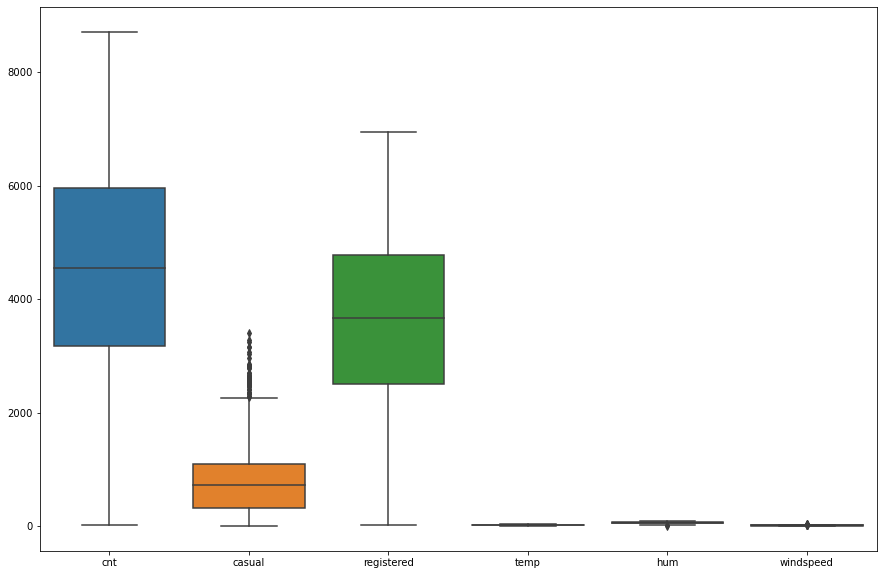

In [48]:
plt.figure(figsize= (15, 10))
sns.boxplot(data = numericas)

### Son pocos Outliers , pero por que tiene "cnt" ?

    Tiene su mayoria de datos de 0 a 2000, de 2000 a 4000 tiene Outliers por que no corresponde con la distribución normal según cnt o registered.
    Pero no debemos modificar estos Outliers. Son datos reales que deben entrar así en el modelo, si no , no sería realista modificar el número de reservas, es lo que estamos intentado responder.

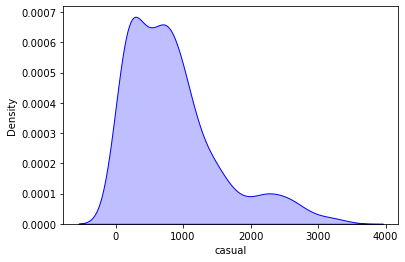

In [49]:
sns.distplot(
    df_bike.casual, 
    hist = False, 
    color = "blue", 
    kde_kws = {"shade": True, "linewidth": 1});

In [50]:
df_bike.head()

,cnt,casual,registered,season_encoding,yr,mnth,day,holiday,weekday,workingday,weathersit,temp,hum,windspeed
0,985,331,654,1,0,1,1,0,6,0,2,14.1,80.6,10.749882
1,801,131,670,1,0,1,2,0,0,0,2,14.9,69.6,16.652113
2,1349,120,1229,1,0,1,3,0,1,1,1,8.1,43.7,16.636703
3,1562,108,1454,3,0,1,4,0,2,1,1,8.2,59.0,10.739832
4,1600,82,1518,3,0,1,5,0,3,1,1,9.3,43.7,12.522300


### Guardamos EDA

In [51]:
df_bike.to_csv("EDA__parte_3.csv")